In [1]:
import os
import sys
import OMPython
from OMPython import OMCSessionZMQ
print(sys.version)
print(os.getcwd())

omc = OMCSessionZMQ()

cmds = [
    "getVersion()",
    "loadModel(NcDataReader2)",
    "loadModel(BuildingSystems)",
    "getClassNames()",
    ]

for cmd in cmds:
    answer = omc.sendExpression(cmd)
    print("\n{}:\n{}".format(cmd, answer))

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
/home/tutorial/git/jupyterNotebooks/OMPython


2018-04-26 11:53:58,066 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.tutorial.port.64f850017b8346d0953733b5df6225f9



getVersion():
OpenModelica 1.13.0~dev-924-g9375dc8

loadModel(NcDataReader2):
True

loadModel(BuildingSystems):
True

getClassNames():
('BuildingSystems', 'ModelicaServices', 'Complex', 'Modelica', 'NcDataReader2')


In [2]:
myModel = "BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem"

cmds = [
    "checkModel({})".format(myModel),
    "simulate({})".format(myModel),
    ]

for cmd in cmds:
    answer = omc.sendExpression(cmd)
    print("\n{}:\n{}".format(cmd, answer))    


checkModel(BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem):
Check of BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem completed successfully.
Class BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem has 102 equation(s) and 102 variable(s).
45 of these are trivial equation(s).

simulate(BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem):
{'timeTotal': 33.213416919, 'timeCompile': 3.625812545, 'simulationOptions': "startTime = 15721200.0, stopTime = 18399600.0, numberOfIntervals = 500, tolerance = 1e-06, method = 'dassl', fileNamePrefix = 'BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem', options = '', outputFormat = 'mat', variableFilter = '.*', cflags = '', simflags = ''", 'timeSimulation': 1.205963117, 'timeTemplates': 0.277957815, 'messages': 'LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.\nLOG_SUCCESS       | info    | The simulation finish

/home/tutorial/git/jupyterNotebooks/OMPython/BuildingSystems.Applications.PhotovoltaicSystems.PhotovoltaicSystem_res.mat
True


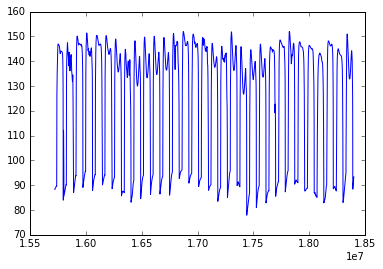

In [3]:
import DyMat
from matplotlib import pyplot as plt

resultFile = os.path.join(os.getcwd(), myModel + "_res.mat")
print(resultFile)
print(os.path.isfile(resultFile))
results = DyMat.DyMatFile(resultFile)

plotVar = "pvField.UField"
myValY = results.data(plotVar)
myTime = results.abscissa(plotVar,valuesOnly=True)

plt.plot(myTime, myValY)
plt.show()